In [72]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [123]:
rawdata = """\
#.#####################
#.......#########...###
#######.#########.#.###
###.....#.>.>.###.#.###
###v#####.#v#.###.#.###
###.>...#.#.#.....#...#
###v###.#.#.#########.#
###...#.#.#.......#...#
#####.#.#.#######.#.###
#.....#.#.#.......#...#
#.#####.#.#.#########v#
#.#...#...#...###...>.#
#.#.#v#######v###.###v#
#...#.>.#...>.>.#.###.#
#####v#.#.###v#.#.###.#
#.....#...#...#.#.#...#
#.#########.###.#.#.###
#...###...#...#...#.###
###.###.#.###v#####v###
#...#...#.#.>.>.#.>.###
#.###.###.#.###.#.#v###
#.....###...###...#...#
#####################.#
"""

In [145]:
with open("input.txt") as f:
    rawdata = f.read()

In [146]:
F = np.array([list(dat) for dat in rawdata[:-1].split('\n')])
F[0,1]='S'
F[-1,-2]='F'
F.shape

(141, 141)

## question 1

In [147]:
steeps = {'v':(1,0), '<':(0,-1), '>':(0,1), '^':(-1,0)}

def traverse(F, irow, icol, vrow, vcol): # start from node + direction.
    length = 0
    while True:
        new_steps = [(irow+1, icol), (irow-1, icol), (irow, icol-1), (irow, icol+1)]
        # from new_steps, remove the direction we are coming from.
        new_steps.remove((irow-vrow, icol-vcol))
        new_symbols = [ (new_step,F[new_step]) for new_step in new_steps if not F[new_step]=='#']
        n = len(new_symbols)
        if n>1: # reached new node
            # filter first ones that are not having correct steep?
            new_symbols = [new_symbol for new_symbol in new_symbols 
                           if steeps[new_symbol[1]] == (new_symbol[0][0] - irow, new_symbol[0][1] - icol)]
            return new_symbols, length
        if n==0:
            print("dead end? at irow, icol")
            return None
        (new_irow, new_icol), symbol = new_symbols[0]
        vrow, vcol = new_irow - irow, new_icol - icol
        if symbol in steeps:
            if not steeps[symbol]==(vrow, vcol):
                print("dead end, cannot traverse steep from this side")
                return None
            else:
                print("coming from good side")
        if symbol == 'F':
            print("reached destination")
            return new_symbols, length
        irow, icol = new_irow, new_icol
        print(irow, icol, vrow, vcol, symbol)
        length += 1

In [148]:
DG = nx.DiGraph()
stack = [(0,1,1,0)]
seen = set((0,1,1,0))
while stack:
    node = stack.pop()
    irow, icol, vrow, vcol = node
    print(node)
    new_symbols, length = traverse(F, *node)
    print("new_symbols:", new_symbols, irow, icol, length)
    for (new_irow, new_icol), steep in new_symbols:
        # if F, add node to graph using new_irow/new_icol else, use previous point.
        if steep=="F":
            DG.add_edge((node[0]-vrow, node[1]-vcol), (new_irow, new_icol), weight=length)
            print('reached destination')
            break
        new_vrow, new_vcol = steeps[steep]
        DG.add_edge((node[0]-vrow, node[1]-vcol), (new_irow-new_vrow, new_icol-new_vcol), weight=length+1)
        print(new_irow, new_icol, steep)
        edge_id = (new_irow, new_icol)+(steeps[steep])
        if edge_id in seen: # only append when direction is not yet sampled
            print("already done", edge_id)
            continue
        seen.add(edge_id)
        stack.append(edge_id)
    print(stack)
    #break

(0, 1, 1, 0)
1 1 1 0 .
1 2 0 1 .
1 3 0 1 .
2 3 1 0 .
3 3 1 0 .
4 3 1 0 .
5 3 1 0 .
5 4 0 1 .
5 5 0 1 .
4 5 -1 0 .
3 5 -1 0 .
2 5 -1 0 .
1 5 -1 0 .
1 6 0 1 .
1 7 0 1 .
2 7 1 0 .
3 7 1 0 .
coming from good side
4 7 1 0 v
5 7 1 0 .
new_symbols: [((6, 7), 'v'), ((5, 8), '>')] 0 1 19
6 7 v
5 8 >
[(6, 7, 1, 0), (5, 8, 0, 1)]
(5, 8, 0, 1)
5 9 0 1 .
4 9 -1 0 .
3 9 -1 0 .
2 9 -1 0 .
1 9 -1 0 .
1 10 0 1 .
1 11 0 1 .
2 11 1 0 .
3 11 1 0 .
3 12 0 1 .
3 13 0 1 .
4 13 1 0 .
5 13 1 0 .
5 12 0 -1 .
5 11 0 -1 .
6 11 1 0 .
7 11 1 0 .
7 12 0 1 .
7 13 0 1 .
7 14 0 1 .
7 15 0 1 .
6 15 -1 0 .
5 15 -1 0 .
4 15 -1 0 .
3 15 -1 0 .
2 15 -1 0 .
1 15 -1 0 .
1 16 0 1 .
1 17 0 1 .
2 17 1 0 .
3 17 1 0 .
3 18 0 1 .
3 19 0 1 .
4 19 1 0 .
5 19 1 0 .
5 18 0 -1 .
5 17 0 -1 .
6 17 1 0 .
7 17 1 0 .
7 18 0 1 .
7 19 0 1 .
8 19 1 0 .
9 19 1 0 .
9 18 0 -1 .
9 17 0 -1 .
9 16 0 -1 .
9 15 0 -1 .
9 14 0 -1 .
9 13 0 -1 .
10 13 1 0 .
11 13 1 0 .
12 13 1 0 .
13 13 1 0 .
14 13 1 0 .
15 13 1 0 .
16 13 1 0 .
17 13 1 0 .
17 14 0 1 .
17 1

In [149]:
nx.dag_longest_path(DG, weight='weight'), nx.dag_longest_path_length(DG, weight='weight')+1

([(-1, 1),
  (5, 7),
  (29, 13),
  (57, 17),
  (87, 11),
  (111, 17),
  (133, 39),
  (125, 63),
  (125, 83),
  (123, 113),
  (131, 137),
  (140, 139)],
 2386)

## question 2

In [153]:
G = DG.to_undirected()

In [154]:
DG2 = G.to_directed()
#DG2.remove_edge((5,3),(-1,1))
#DG2.remove_edge((22, 21),(19,19))
DG2.remove_edge((5,7),(-1,1))
DG2.remove_edge((140, 139),(131, 137))

In [161]:
def dfs_longest_path(graph, current_node, end_node, visited, path_length):
    if current_node == end_node:
        return path_length, [current_node]
    longest_length = float('-inf')
    longest_path = []
    for neighbor in graph.neighbors(current_node):
        if neighbor not in visited:
            visited.add(neighbor)
            edge_weight = graph.get_edge_data(current_node, neighbor)['weight']
            length, new_path = dfs_longest_path(graph, neighbor, end_node, visited, path_length + edge_weight)
            if length > longest_length:
                longest_length = length
                longest_path = [current_node] + new_path
            visited.remove(neighbor)
    return longest_length, longest_path

In [163]:
dfs_longest_path(DG2, (-1,1), (140, 139), set(), 0) + 1

(6245,
 [(-1, 1),
  (5, 7),
  (15, 41),
  (5, 59),
  (33, 63),
  (35, 33),
  (29, 13),
  (57, 17),
  (87, 11),
  (89, 43),
  (59, 31),
  (55, 57),
  (83, 57),
  (83, 87),
  (59, 75),
  (35, 81),
  (7, 89),
  (11, 109),
  (41, 137),
  (29, 107),
  (55, 103),
  (57, 137),
  (79, 137),
  (103, 127),
  (105, 99),
  (105, 87),
  (107, 53),
  (101, 41),
  (111, 17),
  (133, 39),
  (125, 63),
  (125, 83),
  (123, 113),
  (131, 137),
  (140, 139)])

/Users/teunissen/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


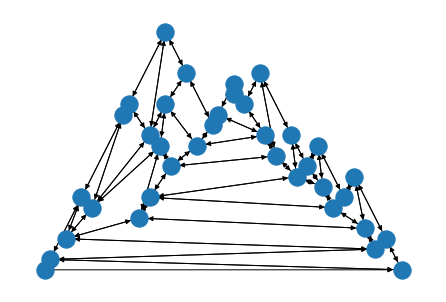

In [165]:
nx.draw_planar(DG2)

In [85]:
#.#####################
#.......#########...###
#######.#########.#.###
###.....#.>.>.###.#.###
###v#####.#v#.###.#.###
###.>...#.#.#.....#...#
###v###.#.#.#########.#
###...#.#.#.......#...#
#####.#.#.#######.#.###
#.....#.#.#.......#...#
#.#####.#.#.#########v#
#.#...#...#...###...>.#
#.#.#v#######v###.###v#
#...#.>.#...>.>.#.###.#
#####v#.#.###v#.#.###.#
#.....#...#...#.#.#...#
#.#########.###.#.#.###
#...###...#...#...#.###
###.###.#.###v#####v###
#...#...#.#.>.>.#.>.###
#.###.###.#.###.#.#v###
#.....###...###...#...#
#####################.#

array([['#', 'S', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#',
        '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
       ['#', '.', '.', '.', '.', '.', '.', '.', '#', '#', '#', '#', '#',
        '#', '#', '#', '#', '.', '.', '.', '#', '#', '#'],
       ['#', '#', '#', '#', '#', '#', '#', '.', '#', '#', '#', '#', '#',
        '#', '#', '#', '#', '.', '#', '.', '#', '#', '#'],
       ['#', '#', '#', '.', '.', '.', '.', '.', '#', '.', '>', '.', '>',
        '.', '#', '#', '#', '.', '#', '.', '#', '#', '#'],
       ['#', '#', '#', 'v', '#', '#', '#', '#', '#', '.', '#', 'v', '#',
        '.', '#', '#', '#', '.', '#', '.', '#', '#', '#'],
       ['#', '#', '#', '.', '>', '.', '.', '.', '#', '.', '#', '.', '#',
        '.', '.', '.', '.', '.', '#', '.', '.', '.', '#'],
       ['#', '#', '#', 'v', '#', '#', '#', '.', '#', '.', '#', '.', '#',
        '#', '#', '#', '#', '#', '#', '#', '#', '.', '#'],
       ['#', '#', '#', '.', '.', '.', '#', '.', '#', '.', '#', '.', '.',
   